# Assignment 4

## Import necessary libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style="whitegrid")

## Description of the dataset

In [36]:
# Load the dataset
data = pd.read_csv("SpamDataset.csv")

# Shape of the dataset
print(f"Shape of the dataset: \n{data.shape}\n")

# Type of each column
print(f"Type of each column: \n{data.dtypes}\n")

# Display the first 5 rows of the dataset
data.head()

Shape of the dataset: 
(4600, 58)

Type of each column: 
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  f

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000,0.897,1.157,0.0,0.127,0.000,0.000,0.127,0.257,0.127,...,0.0,0.192,0.0,0.377,0.068,0.000,2.885,87,478,1
1,0.893,0.000,0.000,0.0,0.000,0.000,0.893,0.000,0.000,0.000,...,0.0,0.000,0.0,0.557,0.000,0.000,2.811,16,59,1
2,0.000,0.549,0.549,0.0,1.099,0.549,2.189,0.000,0.000,0.549,...,0.0,0.166,0.0,0.480,0.000,0.087,15.089,151,381,1
3,0.000,0.000,0.367,0.0,1.107,0.737,0.000,2.957,0.000,2.957,...,0.0,0.146,0.0,1.093,0.000,0.000,5.157,105,287,1
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.274,0.0,0.140,0.000,0.000,2.756,8,25,0


In [37]:
# Describe the dataset
describe_df = data.describe()
describe_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104627,0.213073,0.280670,0.065441,0.312123,0.095835,0.114285,0.105345,0.090105,0.239524,...,0.038547,0.139149,0.016949,0.269102,0.075834,0.044256,5.191111,52.183696,283.305435,0.393913
std,0.305417,1.290788,0.504258,1.395401,0.672530,0.273839,0.391530,0.401039,0.278590,0.644856,...,0.243350,0.270379,0.109342,0.815809,0.245993,0.429307,31.732934,194.909998,606.419489,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004000,-0.004000,-0.007000,-0.008000,-0.005000,-0.004000,0.990000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587750,6.000000,34.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.273500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.421000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.161000,...,0.000000,0.188000,0.000000,0.316000,0.052000,0.000000,3.706250,43.000000,266.250000,1.000000
max,4.538000,14.289000,5.092000,42.814000,9.998000,5.889000,7.278000,11.102000,5.258000,18.171000,...,4.390000,9.742000,4.083000,32.479000,6.009000,19.829000,1102.500000,9984.000000,15840.000000,1.000000


<Figure size 1440x720 with 0 Axes>

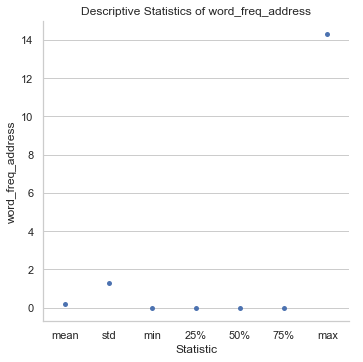

In [38]:
# Visualize the distribution of the variables
describe_df.reset_index(inplace=True)
describe_df = describe_df[describe_df['index'] != 'count']

# Plotting each feature's descriptive statistics
for column in describe_df.columns[2:3]:  # Skip the 'index' column and the target column
    plt.figure(figsize=(20, 10))
    sns.catplot(data=describe_df, x='index', y=column)
    plt.title(f'Descriptive Statistics of {column}')
    plt.ylabel(column)
    plt.xlabel('Statistic')
    plt.show()

## Data Visualization

In [39]:
correlation_matrix = data.iloc[:, :-1].corr()
correlation_matrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,-0.016845,0.066099,0.013366,0.023420,0.059913,0.007922,-0.003872,0.106318,0.041220,...,-0.017925,-0.026637,-0.020763,-0.033592,0.058534,0.117980,-0.008803,0.044656,0.061702,0.089186
word_freq_address,-0.016845,1.000000,-0.033460,-0.006924,-0.023756,-0.024727,0.003962,-0.016280,-0.003799,0.032857,...,-0.015755,-0.007310,-0.049837,-0.018534,-0.014386,-0.009550,0.001971,0.002092,0.000299,-0.022692
word_freq_all,0.066099,-0.033460,1.000000,-0.020254,0.077927,0.087773,0.036820,0.012154,0.093893,0.032238,...,-0.026274,-0.033285,-0.016481,-0.033191,0.108289,0.087993,-0.003364,0.097495,0.107761,0.070148
word_freq_3d,0.013366,-0.006924,-0.020254,1.000000,0.003398,-0.009997,0.019965,0.010349,-0.002418,-0.004958,...,-0.001834,-0.000481,-0.012239,-0.007133,-0.003063,0.010897,-0.000235,0.005263,0.022266,0.021425
word_freq_our,0.023420,-0.023756,0.077927,0.003398,1.000000,0.053915,0.147615,0.029505,0.020926,0.034643,...,-0.031973,-0.032788,-0.046367,-0.026176,0.025545,0.041705,0.002058,0.052718,0.052332,0.002604
word_freq_over,0.059913,-0.024727,0.087773,-0.009997,0.053915,1.000000,0.061502,0.079758,0.117710,0.014007,...,-0.031621,-0.019016,-0.008230,-0.015181,0.065219,0.106161,0.019872,-0.010297,0.090575,0.082212
word_freq_remove,0.007922,0.003962,0.036820,0.019965,0.147615,0.061502,1.000000,0.044712,0.050992,0.056970,...,-0.031468,-0.033226,-0.051780,-0.027699,0.053750,0.070235,0.046698,0.041555,0.060022,-0.008212
word_freq_internet,-0.003872,-0.016280,0.012154,0.010349,0.029505,0.079758,0.044712,1.000000,0.105304,0.083163,...,-0.021260,-0.027397,-0.032505,-0.019698,0.031400,0.058124,-0.008106,0.011279,0.037760,0.040322
word_freq_order,0.106318,-0.003799,0.093893,-0.002418,0.020926,0.117710,0.050992,0.105304,1.000000,0.130817,...,-0.025954,-0.014778,-0.031182,0.012825,0.043821,0.149502,-0.000669,0.111563,0.189417,0.248807
word_freq_mail,0.041220,0.032857,0.032238,-0.004958,0.034643,0.014007,0.056970,0.083163,0.130817,1.000000,...,-0.016763,0.012070,0.004285,0.007170,0.037004,0.075849,0.044722,0.073785,0.103573,0.087392


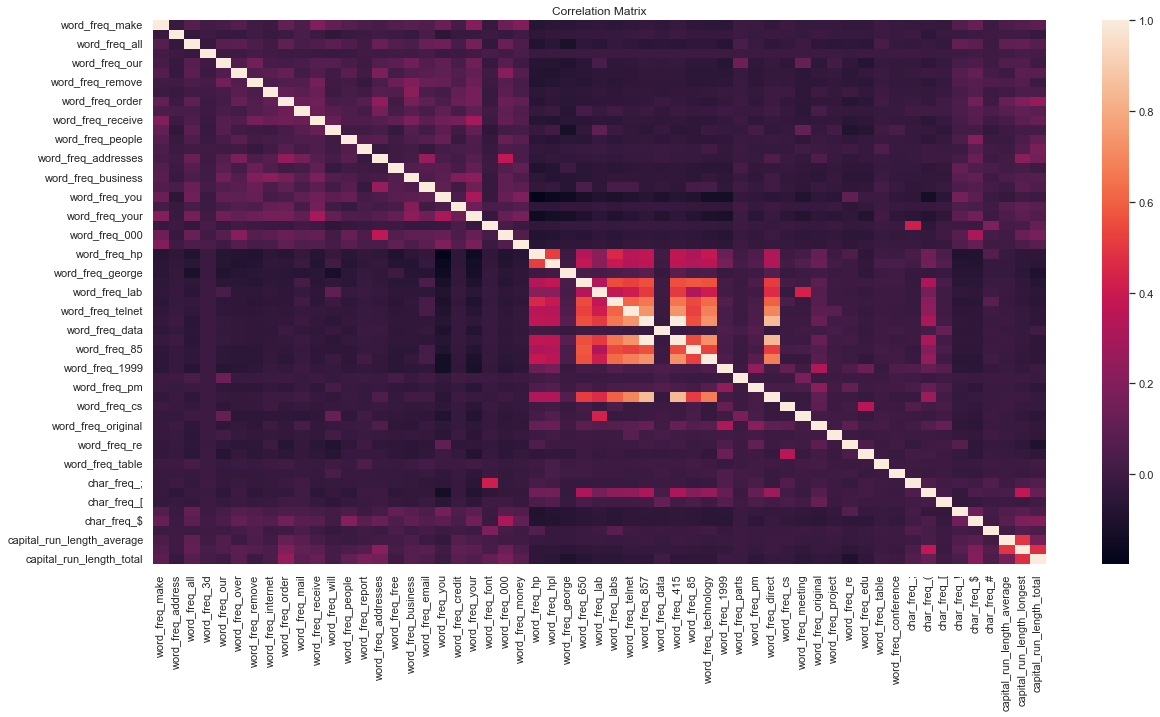

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

## Split the dataset and standardize the features

In [41]:
# Split the dataset into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets, first 3600 rows for training and the rest for testing.
# 10% of the training set will be used for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3600, random_state=42)

print(f"Shape of the training set: {X_train.shape}")
print(f"Shape of the testing set: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

Shape of the training set: (3600, 57)
Shape of the testing set: (1000, 57)


## Create a Callback Class

In [42]:
import os
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    def __init__(self, save_plot_name='./'):
        super().__init__()
        self.save_plot_name = save_plot_name
    
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            
    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))
        plt.title("Prediction Visualization -- Epoch " + str(epoch + 1))

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        # if no directory, create it
        if not os.path.exists(self.save_plot_name):
            os.makedirs(self.save_plot_name)
        plt.savefig(self.save_plot_name + '/plot_' + str(epoch + 1) + '.png')
        plt.close()
        
        clear_output(wait=True)

## Build Keras Model

In [43]:
from sklearn.model_selection import KFold
import keras.initializers
import keras.callbacks

kfolds = 5
epochs = 100
batch_size = 32

kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_model_dir = './saved_models/'
save_plot_dir = './saved_plots/'
fold_var = 1

he_initializer = keras.initializers.initializers_v2.HeNormal(seed=42)
normal_initializer = keras.initializers.initializers_v2.RandomNormal(seed=42)

def get_model_name(k):
    return 'model_'+str(k)+'.h5'

def get_plot_name(k):
    return 'model_'+str(k)

for train_idx, val_idx in kf.split(X_train, y_train):
    training_data = X_train.iloc[train_idx]
    validation_data = X_train.iloc[val_idx]
    training_labels = y_train.iloc[train_idx]
    validation_labels = y_train.iloc[val_idx]
    
    model = Sequential()
    # Hidden layer with 10 units, taking the 57 features as inputs
    model.add(Dense(input_dim=training_data.shape[1],
                    units=10,
                    kernel_initializer=he_initializer,
                    activation='tanh'))
    
    # Added layer to allow plotting the feature space
    # It has 2 units and uses a LINEAR activation, so the network will also learn the
    # mapping from 10-dimensions to 2-dimensions
    model.add(Dense(units=2,
                    kernel_initializer=normal_initializer,
                    activation='linear',
                    name='hidden'))
    
    # Typical output layer for binary classification
    model.add(Dense(units=1,
                    kernel_initializer=normal_initializer,
                    activation='sigmoid',
                    name='output'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    
    # Create a callback to save the model with the best performance (highest validation accuracy)
    model_checkpoint = keras.callbacks.ModelCheckpoint(save_model_dir+get_model_name(fold_var),
                                                       monitor='val_acc',
                                                       save_best_only=True,
                                                       mode='max')
    
    # Create a callback to reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 5 epochs
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')
    
    # Create the callback to interrupt the training if the validation loss does not improve for 10 epochs
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
    
    # Create the callback list
    callbacks = [model_checkpoint, PlotLearning(save_plot_name=save_plot_dir+get_plot_name(fold_var)), reduce_lr, early_stopping]

    print(f'Training for fold {fold_var} ...')

    model.fit(training_data, training_labels, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_labels), callbacks=callbacks, verbose=1)

    print(f'Validation for fold {fold_var} ...')
    
    # Load the best model to evaluate the performance
    model.load_weights(save_model_dir+get_model_name(fold_var))
    
    model.summary()

    loss, accuracy = model.evaluate(validation_data, validation_labels)
    VALIDATION_ACCURACY.append(accuracy)
    VALIDATION_LOSS.append(loss)

    fold_var += 1
    
print("Cross-validation complete.")
print("Mean Validation Accuracy: ", np.mean(VALIDATION_ACCURACY))
print("Best Validation Accuracy: ", np.max(VALIDATION_ACCURACY))
print("Mean Validation Loss: ", np.mean(VALIDATION_LOSS))
print("Best Validation Loss: ", np.min(VALIDATION_LOSS))

Epoch 00040: early stopping
Validation for fold 5 ...
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                580       
                                                                 
 hidden (Dense)              (None, 2)                 22        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________
23/23 [==============================] - 0s 235us/step - loss: 0.2017 - acc: 0.9292
Cross-validation complete.
Mean Validation Accuracy:  0.9366666674613953
Best Validation Accuracy:  0.9527778029441833
Mean Validation Loss:  0.18606494665145873
Best Validation Los

In [44]:
# Convert the plots into videos using ffmpeg
import os

for i in range(1, kfolds + 1):
    os.system(f"ffmpeg -r 20 -i {save_plot_dir}model_{i}/plot_%d.png -c:v libx264 -pix_fmt yuv420p -y -crf 17 {save_plot_dir}model_{i}.mp4")

ffmpeg version 7.0 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopenvino --e

# Non NN model (Random Forest)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

VALIDATION_ACCURACY.clear()
VALIDATION_LOSS.clear()

fold_var = 1

for train_idx, val_idx in kf.split(X_train, y_train):
    training_data = X_train.iloc[train_idx]
    validation_data = X_train.iloc[val_idx]
    training_labels = y_train.iloc[train_idx]
    validation_labels = y_train.iloc[val_idx]
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    print(f'Training for fold {fold_var} ...')
    model.fit(training_data, training_labels)
    
    print(f'Validation for fold {fold_var} ...')
    y_pred = model.predict(validation_data)
    accuracy = accuracy_score(validation_labels, y_pred)
    VALIDATION_ACCURACY.append(accuracy)
    
    fold_var += 1
    
print("Cross-validation complete.")
print("Mean Validation Accuracy: ", np.mean(VALIDATION_ACCURACY))
print("Best Validation Accuracy: ", np.max(VALIDATION_ACCURACY))

Training for fold 1 ...
Validation for fold 1 ...
Training for fold 2 ...
Validation for fold 2 ...
Training for fold 3 ...
Validation for fold 3 ...
Training for fold 4 ...
Validation for fold 4 ...
Training for fold 5 ...
Validation for fold 5 ...
Cross-validation complete.
Mean Validation Accuracy:  0.9480555555555554
Best Validation Accuracy:  0.9555555555555556


## Final Model Training

In [46]:
# Train the final model (random forest)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the final model: {accuracy}")

Accuracy of the final model: 0.964
